***
## Table of Contents
<br>
    <ol><h2><a href='#0' style="text-decoration : none; color : #000000;">1. Loading and Cleaning Data </a></h2> </ol>
    <br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">2. Initial Models</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br> 

<ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">3. Feature Transformation with feature selection </a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#2.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
     
 <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">4. Feature Transformation with PCA</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
     
 <ol>
        <h2><a href='#4' style="text-decoration : none; color : #000000;">5. Comparing Results</a></h2>  
     </ol>
     <br>

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

import researchpy as rp

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
# from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score,precision_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import featuretools as ft

from scipy import stats

Using TensorFlow backend.


In [2]:
### Function to plot Feature Importance

def feat_impt_plot(feat_impt,width_s=1000,height_s=1000):
    data = [go.Bar(x=feat_impt.values,y=feat_impt.index.values,text=np.round(feat_impt,4),
            textposition = 'outside',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6,
            orientation='h'
        )]
    layout = go.Layout(autosize=False,
    width=width_s,
    height=height_s,
    xaxis=dict(title='Feature Importances',
        tickfont=dict(
            size=12,
            color='black'
        )),
    yaxis=dict(automargin=True))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    return cm
 

### The dataset contains http elements present on the specified domain
### <a id='0' style="text-decoration : none; color : #000000;"> 1. Loading and Cleaning Data</a>

In [3]:
df=pd.read_csv('Modified_http.csv',index_col='domain')
df=df.sample(frac=1)
df.Target=df.Target.apply(lambda x: 'Malicious' if x==1 else 'Non_Malicious')
display(df.head())
print("Shape of our dataset:",df.shape)

,Target,http_header-access-control-origin_http:,http_header-access-control-origin_https:,http_header_access-control-allow-credentials,http_header_access-control-allow-methods_cancelupload,http_header_access-control-allow-methods_checkin,http_header_access-control-allow-methods_connect,http_header_access-control-allow-methods_debug,http_header_access-control-allow-methods_delete,http_header_access-control-allow-methods_get,http_header_access-control-allow-methods_head,http_header_access-control-allow-methods_link,http_header_access-control-allow-methods_mkcol,http_header_access-control-allow-methods_move,http_header_access-control-allow-methods_options,http_header_access-control-allow-methods_patch,http_header_access-control-allow-methods_post,http_header_access-control-allow-methods_propfind,http_header_access-control-allow-methods_prpatch,http_header_access-control-allow-methods_put,http_header_access-control-allow-methods_report,http_header_access-control-allow-methods_should,http_header_access-control-allow-methods_trace,http_header_access-control-allow-methods_unlink,http_header_access-control-allow-methods_update,http_header_access-control-custom_count,http_header_access-control-expose-headers_set_true,http_header_access-control-expose-total_count,http_header_access-control-max-age,http_header_cache-control_set_max-age,http_header_cache-control_set_must-revalidate,http_header_cache-control_set_no-cache,http_header_cache-control_set_no-store,http_header_cache-control_set_no-transform,http_header_cache-control_set_private,http_header_cache-control_set_proxy-revalidate,http_header_cache-control_set_public,http_header_cache-control_set_s-maxage,http_header_connection_close,http_header_connection_keep-alive,http_header_content-disposition_attachment,http_header_content-disposition_inline,http_header_content-encoding_br,http_header_content-encoding_compress,http_header_content-encoding_deflate,http_header_content-encoding_gzip,http_header_content-encoding_identify,http_header_content-language_aa,http_header_content-language_ae,http_header_content-language_af,http_header_content-language_ak,http_header_content-language_am,http_header_content-language_an,http_header_content-language_application/*,http_header_content-language_application/ecmascript,http_header_content-language_application/json,http_header_content-language_application/octet-stream,http_header_content-language_ar,http_header_content-language_as,http_header_content-language_audio/*,http_header_content-language_audio/mpeg,http_header_content-language_audio/ogg,http_header_content-language_av,http_header_content-language_ay,http_header_content-language_az,http_header_content-language_ba,http_header_content-language_be,http_header_content-language_bg,http_header_content-language_bh,http_header_content-language_bi,http_header_content-language_blocked-uri,http_header_content-language_bm,http_header_content-language_bn,http_header_content-language_bo,http_header_content-language_br,http_header_content-language_bs,http_header_content-language_ca,http_header_content-language_ce,http_header_content-language_ch,http_header_content-language_co,http_header_content-language_cr,http_header_content-language_cs,http_header_content-language_cu,http_header_content-language_cv,http_header_content-language_cy,http_header_content-language_da,http_header_content-language_de,http_header_content-language_disposition,http_header_content-language_document-uri,http_header_content-language_dv,http_header_content-language_dz,http_header_content-language_ee,http_header_content-language_effective-directive,http_header_content-language_el,http_header_content-language_en,http_header_content-language_eo,http_header_content-language_es,http_header_content-language_et,http_header_content-language_eu,http_header_content-language_fa,http_header_content-language_ff,http_header_content-language_fi,http_header_content-language_fj,http_header_content-language_fo,http_header_content-language_fr,http_header_co

Shape of our dataset: (45856, 672)


#### Let us analyze the balance of classes

In [4]:
data = [go.Bar(x=df.Target.value_counts().index.values,
               y=df.Target.value_counts().values,
               text=df.Target.value_counts().values,
               textposition = 'outside',
            )]
layout = go.Layout( xaxis=dict(title='Domain Type',tickfont=dict(size=12,color='black')),
                    yaxis=dict(title='Number of Instances'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### We can see from the graph that there is high imbalance in the dataset. We can handle it either by oversampling, undersampling or tuning our models to focus on recall/precision to address the problem

#### Cleaning and analyzing the dataset.


#### We know that many of the features will all have no more than one unique value. Hence, we will first identify and drop those features

#### Columns which have do not have any unique values

In [5]:
col_no_unique=[]
for col in df.columns[1:]:
    if len(df[col].value_counts())==1:
        print(col)
        col_no_unique.append(col)

http_header_access-control-allow-methods_prpatch
http_header_access-control-expose-headers_set_true
http_header_content-encoding_br
http_header_content-encoding_compress
http_header_content-encoding_identify
http_header_content-language_aa
http_header_content-language_ak
http_header_content-language_application/*
http_header_content-language_application/ecmascript
http_header_content-language_as
http_header_content-language_audio/*
http_header_content-language_audio/mpeg
http_header_content-language_audio/ogg
http_header_content-language_av
http_header_content-language_ay
http_header_content-language_ba
http_header_content-language_bg
http_header_content-language_bh
http_header_content-language_blocked-uri
http_header_content-language_bm
http_header_content-language_bn
http_header_content-language_bo
http_header_content-language_ce
http_header_content-language_cr
http_header_content-language_cv
http_header_content-language_document-uri
http_header_content-language_dv
http_header_conten

http_header_vary_expect
http_header_vary_expect-ct
http_header_vary_expires
http_header_vary_feature-policy
http_header_vary_from
http_header_vary_if-match
http_header_vary_if-modified-since
http_header_vary_if-none-match
http_header_vary_if-range
http_header_vary_if-unmodified-since
http_header_vary_index
http_header_vary_keep-alive
http_header_vary_large-allocation
http_header_vary_pragma
http_header_vary_proxy-authenticate
http_header_vary_public-key-pins
http_header_vary_public-key-pins-report-only
http_header_vary_range
http_header_vary_referrer-policy
http_header_vary_retry-after
http_header_vary_sec-websocket-accept
http_header_vary_server
http_header_vary_server-timing
http_header_vary_set-cookie2
http_header_vary_sourcemap
http_header_vary_strict-transport-security
http_header_vary_timing-allow-origin
http_header_vary_tk
http_header_vary_trailer
http_header_vary_transfer-encoding
http_header_vary_via
http_header_vary_warning
http_header_vary_www-authenticate
http_header_vary_x

In [6]:
print("{} columns have only one unique value in them rendering them less meaningless for classification".format(len(col_no_unique)))

### Drop those columns
df.drop(col_no_unique,axis=1,inplace=True)

print("Shape of our dataset after dropping them:",df.shape)

400 columns have only one unique value in them rendering them less meaningless for classification
Shape of our dataset after dropping them: (45856, 272)


In [7]:
### Check and converting data types
df['Target']=df.Target.apply(lambda x: 1 if x=='Malicious' else 0)

print("Columns which are of type object:",df.dtypes[(df.dtypes=='object')])

Columns which are of type object: Series([], dtype: object)


#### All of our features are either numerical  in nature.

#### Check for missing data

In [8]:
df.isnull().sum()

Target                                                           0
http_header-access-control-origin_http:                          0
http_header-access-control-origin_https:                         0
http_header_access-control-allow-credentials                     0
http_header_access-control-allow-methods_cancelupload            0
http_header_access-control-allow-methods_checkin                 0
http_header_access-control-allow-methods_connect                 0
http_header_access-control-allow-methods_debug                   0
http_header_access-control-allow-methods_delete                  0
http_header_access-control-allow-methods_get                     0
http_header_access-control-allow-methods_head                    0
http_header_access-control-allow-methods_link                    0
http_header_access-control-allow-methods_mkcol                   0
http_header_access-control-allow-methods_move                    0
http_header_access-control-allow-methods_options              

#### No missing data exists

#### Next check to see which features have less than 5% varying data

In [9]:
lst=[]
for col in df.columns[1:]:
    lst.append([col,dict(df[col].value_counts()),df[col].value_counts()[0]>=len(df)*0.95])

col_values=pd.DataFrame(lst,columns=['Feature','Value_Counts','95_%_same_values'])
col_values.set_index('Feature',drop=True,inplace=True)
del lst
col_values.head(5)

,Value_Counts,95_%_same_values
Feature,,
http_header-access-control-origin_http:,"{0: 45660, 1: 196}",True
http_header-access-control-origin_https:,"{0: 45574, 1: 282}",True
http_header_access-control-allow-credentials,"{0: 45368, 1: 488}",True
http_header_access-control-allow-methods_cancelupload,"{0: 45855, 1: 1}",True
http_header_access-control-allow-methods_checkin,"{0: 45855, 1: 1}",True


In [10]:
col_values['95_%_same_values'].value_counts()

True     245
False     26
Name: 95_%_same_values, dtype: int64

### <a id='1' style="text-decoration : none; color : #000000;"> 2. Initial Models</a>

In [11]:
columns=col_values[col_values['95_%_same_values']==False].index.values
print('Features we will be using:\n')
display(columns.tolist())

Features we will be using:



['http_header_cache-control_set_max-age',
 'http_header_cache-control_set_must-revalidate',
 'http_header_cache-control_set_no-cache',
 'http_header_cache-control_set_no-store',
 'http_header_cache-control_set_private',
 'http_header_cache-control_set_public',
 'http_header_connection_close',
 'http_header_connection_keep-alive',
 'http_header_content-encoding_gzip',
 'http_header_content-language_text/html',
 'http_header_content-length',
 'http_header_expect-ctmax-age',
 'http_header_expect-ctreport-uri',
 'http_header_marco_contenttext',
 'http_header_pragmano-cache',
 'http_header_server_apache',
 'http_header_server_nginx',
 'http_header_strict-transport-security_max-age',
 'http_header_transfer-encoding_chunked',
 'http_header_vary_accept',
 'http_header_vary_accept-encoding',
 'http_header_vary_age',
 'http_header_vary_user-agent',
 'http_header_via_1.1',
 'http_header_x-cintent-type-options_nosniff',
 'http_header_x-xss-enabled']

### Lets build a table to focus on Chi-sqaure test and result for categorical variables (As many of the features indicate the presence of an element or not)

#### Except for the features ,http_header_x-cintent-type-options_nosniff, http_header_strict-transport-security_max-age,http_header_marco_contenttext, http_header_content-length, other are categorical in nature. We will use the chi2 test of indpendence to see if there exists any assoication/relationship between the dependent variable and independent variables.

In [12]:
exl=['http_header_x-cintent-type-options_nosniff', 'http_header_strict-transport-security_max-age',
     'http_header_marco_contenttext', 'http_header_content-length']

lst=[]
for col in columns:
    if col not in  exl:
        table, results = rp.crosstab(df['Target'], df[col], prop= 'col', test= 'chi-square')
        x=results['results'].values.tolist()
        x.append(col)
        lst.append(x)

In [13]:
chi_df=pd.DataFrame(lst,columns=['Pearson Chi-square','p-value','Cramers V','Feature'])
chi_df.set_index('Feature',drop=True,inplace=True)
chi_df.sort_values(by='Cramers V',ascending=False,inplace=True)
del lst
chi_df

,Pearson Chi-square,p-value,Cramers V
Feature,,,
http_header_content-encoding_gzip,9686.2477,0.0,0.4596
http_header_content-language_text/html,9548.2797,0.0,0.4563
http_header_vary_accept,5024.0796,0.0,0.3310
http_header_vary_accept-encoding,4979.9830,0.0,0.3295
http_header_connection_keep-alive,4052.6234,0.0,0.2973
http_header_transfer-encoding_chunked,3995.7784,0.0,0.2952
http_header_cache-control_set_max-age,1868.6053,0.0,0.2019
http_header_server_nginx,1404.5624,0.0,0.1750
http_header_x-xss-enabled,771.5071,0.0,0.1297


#### We can read the table as follows:  
 1. Cramers phi generally indicates association between two categorical variables [between 0 to +1]
 2. p-values indicate the siginificance of the results, the null hypothesis is that there is no association between the two variables
 
 
#### Hence, we can see which variables have a strong relation with the dependent variable, we can later cross-check this with the feature importances generated by ensemble models

#### lets see if for the rest of continuous variables if there exists any relationship using Point biserial correlation.
####  The PointBiserial Correlation is a special case of Pearson co-rrelation for Correlation between continuous and dichotomus binary variable. 

In [14]:
exl=['http_header_x-cintent-type-options_nosniff', 'http_header_strict-transport-security_max-age',
     'http_header_marco_contenttext', 'http_header_content-length']

In [15]:
for col in exl:
    print("Corelation between",col,"and dependent variable is:",stats.pointbiserialr(df[col],df.Target)[0])

Corelation between http_header_x-cintent-type-options_nosniff and dependent variable is: -0.140954488673
Corelation between http_header_strict-transport-security_max-age and dependent variable is: -0.13717556276
Corelation between http_header_marco_contenttext and dependent variable is: -0.457290817937
Corelation between http_header_content-length and dependent variable is: -0.0725209655904


#### We can also conduct a ttest to see if the two means are different

In [16]:
for col in exl:
    print('Ttest value for ',col,"",stats.ttest_ind(df[df.Target==1][col], df[df.Target==0][col], equal_var=False))

Ttest value for  http_header_x-cintent-type-options_nosniff  Ttest_indResult(statistic=-64.192673101556949, pvalue=0.0)
Ttest value for  http_header_strict-transport-security_max-age  Ttest_indResult(statistic=-61.878218594871313, pvalue=0.0)
Ttest value for  http_header_marco_contenttext  Ttest_indResult(statistic=-72.017274478092489, pvalue=0.0)
Ttest value for  http_header_content-length  Ttest_indResult(statistic=-19.896050742160892, pvalue=2.0423650002356105e-86)


#### The ttest conduncted supports the results of point biserial correlation. 

#### Hence, we see that all the features we selected are related to the dependent variable.

### Lets start by building some basic models 

In [17]:
### Preparing our training and test sets

X=df[columns].values
y=df.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [18]:
## Table to store training and test measures so we can compare later
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='1.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [19]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.906444226359


Predicted  False  True  __all__
Actual                         
False      29070  2760    31830
True         672  4182     4854
__all__    29742  6942    36684

The accuracy of the model on test data is: 0.902202354993


Predicted  False  True  __all__
Actual                         
False       7279   726     8005
True         171   996     1167
__all__     7450  1722     9172

#### <a id='1.B' style="text-decoration : none; color : #000000;"> B. Random Forest Classifier</a>

In [20]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.919965107404


Predicted  False  True  __all__
Actual                         
False      29362  2468    31830
True         468  4386     4854
__all__    29830  6854    36684

The accuracy of the model on test data is: 0.90678150894


Predicted  False  True  __all__
Actual                         
False       7330   675     8005
True         180   987     1167
__all__     7510  1662     9172

In [21]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
http_header_content-length,0.268243
http_header_marco_contenttext,0.114337
http_header_content-encoding_gzip,0.104847
http_header_transfer-encoding_chunked,0.099625
http_header_vary_accept-encoding,0.062462
http_header_content-language_text/html,0.058711
http_header_server_apache,0.047869
http_header_server_nginx,0.029831
http_header_connection_keep-alive,0.024544
http_header_vary_accept,0.022935


#### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Extra Tree Classifier</a>

In [22]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.921736997056


Predicted  False  True  __all__
Actual                         
False      29388  2442    31830
True         429  4425     4854
__all__    29817  6867    36684

The accuracy of the model on test data is: 0.906454426515


Predicted  False  True  __all__
Actual                         
False       7325   680     8005
True         178   989     1167
__all__     7503  1669     9172

In [23]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
http_header_content-length,0.224275
http_header_content-encoding_gzip,0.173199
http_header_content-language_text/html,0.106288
http_header_marco_contenttext,0.080719
http_header_server_apache,0.059898
http_header_transfer-encoding_chunked,0.055661
http_header_connection_keep-alive,0.031962
http_header_pragmano-cache,0.027574
http_header_cache-control_set_max-age,0.025484
http_header_vary_accept-encoding,0.025451


In [24]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt)

#### The results are good. The models seem to be perfoming well and have a good FPR and FNR. Next we will perform feature tranformations to see how we can improve results

### <a id='2' style="text-decoration : none; color : #000000;"> 3. Feature Transformation with feature selection</a>

In [25]:
df.reset_index(inplace=True)

columns=columns.tolist()
columns.append('domain')

df_min=df[columns]

In [26]:
es = ft.EntitySet(id = 'malicious')
es.entity_from_dataframe(entity_id = 'data', dataframe = df_min, index = 'domain')

feature_matrix_sessions, features_defs = ft.dfs(entityset=es,target_entity="data",
                                                trans_primitives = ['add','divide','multiply'],n_jobs=-1,
                                                verbose=1,max_depth=1)

Built 1326 features
EntitySet scattered to workers in 5.743 seconds
Elapsed: 00:11 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


#### Lets have a look at the feature set generated

In [27]:
feature_matrix_sessions.head()

,http_header_cache-control_set_max-age,http_header_cache-control_set_must-revalidate,http_header_cache-control_set_no-cache,http_header_cache-control_set_no-store,http_header_cache-control_set_private,http_header_cache-control_set_public,http_header_connection_close,http_header_connection_keep-alive,http_header_content-encoding_gzip,http_header_content-language_text/html,http_header_content-length,http_header_expect-ctmax-age,http_header_expect-ctreport-uri,http_header_marco_contenttext,http_header_pragmano-cache,http_header_server_apache,http_header_server_nginx,http_header_strict-transport-security_max-age,http_header_transfer-encoding_chunked,http_header_vary_accept,http_header_vary_accept-encoding,http_header_vary_age,http_header_vary_user-agent,http_header_via_1.1,http_header_x-cintent-type-options_nosniff,http_header_x-xss-enabled,http_header_connection_close + http_header_transfer-encoding_chunked,http_header_vary_age + http_header_via_1.1,http_header_pragmano-cache + http_header_vary_age,http_header_connection_keep-alive + http_header_vary_accept-encoding,http_header_marco_contenttext + http_header_server_apache,http_header_connection_close + http_header_via_1.1,http_header_cache-control_set_no-cache + http_header_expect-ctmax-age,http_header_transfer-encoding_chunked + http_header_vary_accept,http_header_cache-control_set_public + http_header_vary_age,http_header_marco_contenttext + http_header_vary_accept,http_header_cache-control_set_public + http_header_strict-transport-security_max-age,http_header_cache-control_set_no-store + http_header_expect-ctmax-age,http_header_cache-control_set_must-revalidate + http_header_content-encoding_gzip,http_header_cache-control_set_private + http_header_vary_accept,http_header_connection_close + http_header_expect-ctmax-age,http_header_connection_keep-alive + http_header_x-cintent-type-options_nosniff,http_header_vary_age + http_header_x-xss-enabled,http_header_cache-control_set_no-cache + http_header_cache-control_set_public,http_header_vary_accept + http_header_vary_user-agent,http_header_cache-control_set_must-revalidate + http_header_expect-ctmax-age,http_header_server_apache + http_header_server_nginx,http_header_content-encoding_gzip + http_header_via_1.1,http_header_connection_close + http_header_server_nginx,http_header_cache-control_set_no-cache + http_header_cache-control_set_private,http_header_connection_keep-alive + http_header_transfer-encoding_chunked,http_header_content-language_text/html + http_header_vary_accept,http_header_cache-control_set_no-store + http_header_server_nginx,http_header_cache-control_set_private + http_header_content-length,http_header_vary_accept-encoding + http_header_x-cintent-type-options_nosniff,http_header_transfer-encoding_chunked + http_header_vary_user-agent,http_header_content-encoding_gzip + http_header_expect-ctreport-uri,http_header_connection_keep-alive + http_header_server_apache,http_header_expect-ctreport-uri + http_header_via_1.1,http_header_marco_contenttext + http_header_vary_user-agent,http_header_pragmano-cache + http_header_x-xss-enabled,http_header_x-cintent-type-options_nosniff + http_header_x-xss-enabled,http_header_cache-control_set_must-revalidate + http_header_server_nginx,http_header_marco_contenttext + http_header_x-xss-enabled,http_header_pragmano-cache + http_header_vary_user-agent,http_header_cache-control_set_public + http_header_marco_contenttext,http_header_cache-control_set_max-age + http_header_x-cintent-type-options_nosniff,http_header_content-length + http_header_vary_accept-encoding,http_header_cache-control_set_no-store + http_header_content-encoding_gzip,http_header_expect-ctreport-uri + http_header_transfer-encoding_chunked,http_header_cache-control_set_max-age + http_header_connection_keep-alive,http_header_content-language_text/html + http_header_server_nginx,http_header_content-length + http_header_x-cintent-type-options_nosniff,http_header_cache-control_set_max-age + http_header_vary_accept-encodi

In [28]:
df.set_index(['domain'],drop=True,inplace=True)

fs=pd.merge(feature_matrix_sessions,pd.DataFrame(df.Target),left_index=True, right_index=True)

#### Now we have a very huge feature-set and generally more features can cause over-fitting. Hence, we will use a combination of feature selection techniques to select only a few from them.

In [29]:
X=fs.loc[:,df.columns!='Target']
y=fs.Target
feature_name = X.columns.tolist()

In [30]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X, y)


X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()


rfe_selector = RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=100, step=10, verbose=False)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()


embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0), threshold='23*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()


feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [31]:
X=fs[feature_selection_df[feature_selection_df.Total>=3]['Feature']]
y=fs.Target.values
feature_name = X.columns.tolist()

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(45856, 28)

In [32]:
## Table to store training and test measures so we can compare later
table_80_60_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_60_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [33]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.888152873187


Predicted  False  True  __all__
Actual                         
False      28933  2946    31879
True        1157  3648     4805
__all__    30090  6594    36684

The accuracy of the model on test data is: 0.885194068905


Predicted  False  True  __all__
Actual                         
False       7212   744     7956
True         309   907     1216
__all__     7521  1651     9172

#### <a id='2.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [34]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.888343692073


Predicted  False  True  __all__
Actual                         
False      28932  2947    31879
True        1149  3656     4805
__all__    30081  6603    36684

The accuracy of the model on test data is: 0.88508504143


Predicted  False  True  __all__
Actual                         
False       7211   745     7956
True         309   907     1216
__all__     7520  1652     9172

In [35]:
f_r=pd.DataFrame(rf.feature_importances_,index=feature_name)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
http_header_transfer-encoding_chunked + http_header_vary_accept,0.127707
http_header_content-encoding_gzip + http_header_vary_accept,0.126806
http_header_cache-control_set_private + http_header_content-encoding_gzip,0.125958
http_header_content-encoding_gzip + http_header_via_1.1,0.117319
http_header_content-encoding_gzip + http_header_transfer-encoding_chunked,0.063835
http_header_cache-control_set_no-store + http_header_content-encoding_gzip,0.059027
http_header_marco_contenttext + http_header_via_1.1,0.055393
http_header_server_nginx + http_header_transfer-encoding_chunked,0.040538
http_header_connection_keep-alive,0.038350
http_header_expect-ctmax-age + http_header_marco_contenttext,0.026176


#### <a id='2.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [36]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.888398211754


Predicted  False  True  __all__
Actual                         
False      28933  2946    31879
True        1148  3657     4805
__all__    30081  6603    36684

The accuracy of the model on test data is: 0.88530309638


Predicted  False  True  __all__
Actual                         
False       7212   744     7956
True         308   908     1216
__all__     7520  1652     9172

In [37]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=feature_name)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
http_header_content-encoding_gzip + http_header_x-xss-enabled,0.118629
http_header_cache-control_set_private + http_header_content-encoding_gzip,0.080021
http_header_content-encoding_gzip + http_header_vary_accept,0.071192
http_header_marco_contenttext + http_header_via_1.1,0.069451
http_header_content-encoding_gzip + http_header_via_1.1,0.066303
http_header_server_nginx + http_header_vary_accept,0.064498
http_header_content-encoding_gzip + http_header_transfer-encoding_chunked,0.064222
http_header_cache-control_set_no-store + http_header_content-encoding_gzip,0.058504
http_header_content-language_text/html + http_header_via_1.1,0.056945
http_header_transfer-encoding_chunked + http_header_vary_accept,0.056534


In [38]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))
avg_feat_impt

http_header_cache-control_set_private + http_header_content-encoding_gzip         0.102990
http_header_content-encoding_gzip + http_header_vary_accept                       0.098999
http_header_transfer-encoding_chunked + http_header_vary_accept                   0.092121
http_header_content-encoding_gzip + http_header_via_1.1                           0.091811
http_header_content-encoding_gzip + http_header_x-xss-enabled                     0.068278
http_header_content-encoding_gzip + http_header_transfer-encoding_chunked         0.064029
http_header_marco_contenttext + http_header_via_1.1                               0.062422
http_header_cache-control_set_no-store + http_header_content-encoding_gzip        0.058766
http_header_server_nginx + http_header_transfer-encoding_chunked                  0.048340
http_header_server_nginx + http_header_vary_accept                                0.044082
http_header_content-language_text/html + http_header_via_1.1                      0.036275

#### In Section 2.1, we reduced the feature set by perfroming feature selection. ALternatively we can make use of dimensionalitu rediction techniques such as PCA. Let us see how it fares

### <a id='3' style="text-decoration : none; color : #000000;"> 4. Feature Transformation with PCA</a>

In [39]:
X=fs.loc[:,df.columns!='Target']
y=fs.Target.values
feature_name = X.columns.tolist()
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

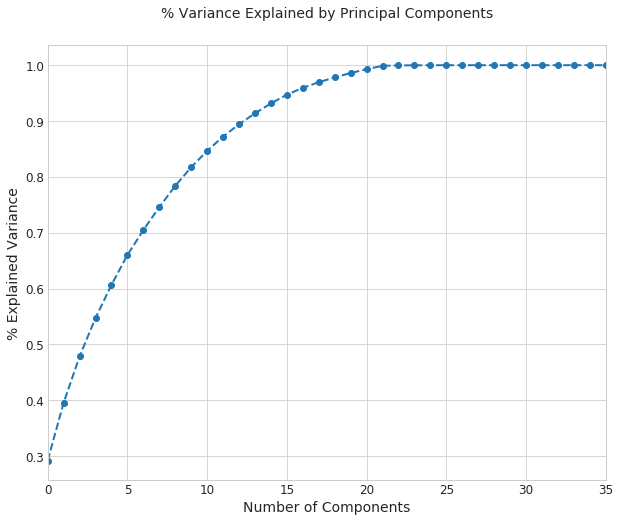

In [40]:
sns.set_style('whitegrid')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.xlim([0,35])
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.show()

In [41]:
pca=PCA(n_components=21,whiten=True,random_state=0)
X_pca_21=pca.fit_transform(scaled_X)
print("Variance explained using 21 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 21 components is: 0.992754146358


In [42]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_21,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [43]:
## Table to store training and test measures so we can compare later
table_80_70_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='3.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [44]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_train.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.905053974485


Predicted  False  True  __all__
Actual                         
False      29150  2729    31879
True         754  4051     4805
__all__    29904  6780    36684

The accuracy of the model on test data is: 0.902202354993


Predicted  False  True  __all__
Actual                         
False       7280   676     7956
True         221   995     1216
__all__     7501  1671     9172

#### <a id='3.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [45]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.920046886926


Predicted  False  True  __all__
Actual                         
False      29398  2481    31879
True         452  4353     4805
__all__    29850  6834    36684

The accuracy of the model on test data is: 0.907980811164


Predicted  False  True  __all__
Actual                         
False       7299   657     7956
True         187  1029     1216
__all__     7486  1686     9172

#### <a id='3.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [46]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.921627957693


Predicted  False  True  __all__
Actual                         
False      29414  2465    31879
True         410  4395     4805
__all__    29824  6860    36684

The accuracy of the model on test data is: 0.90721761884


Predicted  False  True  __all__
Actual                         
False       7289   667     7956
True         184  1032     1216
__all__     7473  1699     9172

### <a id='4' style="text-decoration : none; color : #000000;">5. Comparing Results</a>

In [47]:
indx=['Neural_Network','RandomForestClassifier','ExtraTreeClassifier']

table_80_50_test['index']=indx
table_80_50_train['index']=indx

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

table_80_60_test['index']=indx
table_80_60_train['index']=indx

table_80_60_test.set_index(['index'],drop=True,inplace=True)
table_80_60_train.set_index(['index'],drop=True,inplace=True)

table_80_70_test['index']=indx
table_80_70_train['index']=indx

table_80_70_test.set_index(['index'],drop=True,inplace=True)
table_80_70_train.set_index(['index'],drop=True,inplace=True)

In [48]:
display(table_80_50_train)
display(table_80_50_test)

,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.906444,4182.0,29070.0,2760.0,672.0,0.086711,0.138443
RandomForestClassifier,0.919965,4386.0,29362.0,2468.0,468.0,0.077537,0.096415
ExtraTreeClassifier,0.921737,4425.0,29388.0,2442.0,429.0,0.076720,0.088381


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.902202,996.0,7279.0,726.0,171.0,0.090693,0.146530,0.881389
RandomForestClassifier,0.906782,987.0,7330.0,675.0,180.0,0.084322,0.154242,0.880718
ExtraTreeClassifier,0.906454,989.0,7325.0,680.0,178.0,0.084947,0.152528,0.881263


In [49]:
display(table_80_60_train)
display(table_80_60_test)

,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.888153,3648.0,28933.0,2946.0,1157.0,0.092412,0.240791
RandomForestClassifier,0.888344,3656.0,28932.0,2947.0,1149.0,0.092443,0.239126
ExtraTreeClassifier,0.888398,3657.0,28933.0,2946.0,1148.0,0.092412,0.238918


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.885194,907.0,7212.0,744.0,309.0,0.093514,0.254112,0.826187
RandomForestClassifier,0.885085,907.0,7211.0,745.0,309.0,0.093640,0.254112,0.826124
ExtraTreeClassifier,0.885303,908.0,7212.0,744.0,308.0,0.093514,0.253289,0.826598


In [50]:
display(table_80_70_train)
display(table_80_70_test)

,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.905054,4051.0,29150.0,2729.0,754.0,0.085605,0.156920
RandomForestClassifier,0.920047,4353.0,29398.0,2481.0,452.0,0.077826,0.094069
ExtraTreeClassifier,0.921628,4395.0,29414.0,2465.0,410.0,0.077324,0.085328


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.902202,995.0,7280.0,676.0,221.0,0.084967,0.181743,0.866645
RandomForestClassifier,0.907981,1029.0,7299.0,657.0,187.0,0.082579,0.153783,0.881819
ExtraTreeClassifier,0.907218,1032.0,7289.0,667.0,184.0,0.083836,0.151316,0.882424


#### We can see from the results that feature transformations combined with feature selection does not fare well as compared to other two approaches. Hence we will graphically compare the results of other two approaches

In [51]:
trace0 = go.Scatter(x=table_80_50_test.iloc[0].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[0].values[[0,5,6,7]],
                    mode = 'lines',
                    name = 'Neural_Network')

trace1 = go.Scatter(x=table_80_50_test.iloc[1].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[1].values[[0,5,6,7]],
                    mode = 'lines+markers',
                    name = 'RandomForestClassifier')

trace2 = go.Scatter(x=table_80_50_test.iloc[2].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[2].values[[0,5,6,7]],
                    mode = 'lines+markers',marker=dict(symbol='x'),
                    name = 'ExtraTree Classifier')

data = [trace0, trace1, trace2]
layout = go.Layout(yaxis=dict(tick0=0,dtick=0.05),title='Result comparision for Features selected in Section 1')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Result')

In [52]:
trace0 = go.Scatter(x=table_80_70_test.iloc[0].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[0].values[[0,5,6,7]],
                    mode = 'lines',
                    name = 'Neural_Network')

trace1 = go.Scatter(x=table_80_70_test.iloc[1].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[1].values[[0,5,6,7]],
                    mode = 'lines+markers',
                    name = 'RandomForestClassifier')

trace2 = go.Scatter(x=table_80_70_test.iloc[2].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[2].values[[0,5,6,7]],
                    mode = 'lines+markers',marker=dict(symbol='x'),
                    name = 'ExtraTree Classifier')

data = [trace0, trace1, trace2]
layout = go.Layout(yaxis=dict(tick0=0,dtick=0.05),title='Result comparision for Features selected in Section 1')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Result')

#### Both the Extra Tree Model and Random Forest Classifier perform well.  We can try to improve the results by perfroming Grid Search and hypertuning the parameters

### Lets try the same approaches using oversampling (SMOTE technique) to see if we can improve the results

In [53]:
columns=col_values[col_values['95_%_same_values']==False].index.values
print('Features we will be using:\n')
display(columns.tolist())

Features we will be using:



['http_header_cache-control_set_max-age',
 'http_header_cache-control_set_must-revalidate',
 'http_header_cache-control_set_no-cache',
 'http_header_cache-control_set_no-store',
 'http_header_cache-control_set_private',
 'http_header_cache-control_set_public',
 'http_header_connection_close',
 'http_header_connection_keep-alive',
 'http_header_content-encoding_gzip',
 'http_header_content-language_text/html',
 'http_header_content-length',
 'http_header_expect-ctmax-age',
 'http_header_expect-ctreport-uri',
 'http_header_marco_contenttext',
 'http_header_pragmano-cache',
 'http_header_server_apache',
 'http_header_server_nginx',
 'http_header_strict-transport-security_max-age',
 'http_header_transfer-encoding_chunked',
 'http_header_vary_accept',
 'http_header_vary_accept-encoding',
 'http_header_vary_age',
 'http_header_vary_user-agent',
 'http_header_via_1.1',
 'http_header_x-cintent-type-options_nosniff',
 'http_header_x-xss-enabled']

In [54]:
### Preparing our training and test sets
X=df[columns].values
y=df.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

The train/test split ratio is 80:20


In [56]:
## Table to store training and test measures so we can compare later
table_80_80_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_80_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [57]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.908828149548


Predicted  False   True  __all__
Actual                          
False      28028   3802    31830
True        2002  29828    31830
__all__    30030  33630    63660

The accuracy of the model on test data is: 0.883340601832


Predicted  False  True  __all__
Actual                         
False       7042   963     8005
True         107  1060     1167
__all__     7149  2023     9172

In [58]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.933678919259


Predicted  False   True  __all__
Actual                          
False      28484   3346    31830
True         876  30954    31830
__all__    29360  34300    63660

The accuracy of the model on test data is: 0.881596162233


Predicted  False  True  __all__
Actual                         
False       7034   971     8005
True         115  1052     1167
__all__     7149  2023     9172

In [59]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
http_header_content-length,0.186477
http_header_content-encoding_gzip,0.138267
http_header_transfer-encoding_chunked,0.114181
http_header_vary_accept-encoding,0.103600
http_header_marco_contenttext,0.066087
http_header_content-language_text/html,0.063167
http_header_vary_accept,0.058069
http_header_server_apache,0.037688
http_header_server_nginx,0.031251
http_header_pragmano-cache,0.029096


In [60]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.936019478479


Predicted  False   True  __all__
Actual                          
False      28588   3242    31830
True         831  30999    31830
__all__    29419  34241    63660

The accuracy of the model on test data is: 0.882359354557


Predicted  False  True  __all__
Actual                         
False       7042   963     8005
True         116  1051     1167
__all__     7158  2014     9172

In [61]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
http_header_content-encoding_gzip,0.222786
http_header_vary_accept,0.139377
http_header_content-length,0.119663
http_header_transfer-encoding_chunked,0.061171
http_header_server_apache,0.054409
http_header_content-language_text/html,0.044868
http_header_connection_keep-alive,0.040806
http_header_cache-control_set_max-age,0.038998
http_header_vary_accept-encoding,0.036024
http_header_server_nginx,0.029715


In [62]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt)

### Lets now see the results of undersampling. 

In [65]:
df_non=df[df.Target==0]
df_mal=df[df.Target==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)
df_u.Target.value_counts() 

X=df_u[columns]
y=df_u.Target.values

feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (12042, 272)


,Target,http_header-access-control-origin_http:,http_header-access-control-origin_https:,http_header_access-control-allow-credentials,http_header_access-control-allow-methods_cancelupload,http_header_access-control-allow-methods_checkin,http_header_access-control-allow-methods_connect,http_header_access-control-allow-methods_debug,http_header_access-control-allow-methods_delete,http_header_access-control-allow-methods_get,http_header_access-control-allow-methods_head,http_header_access-control-allow-methods_link,http_header_access-control-allow-methods_mkcol,http_header_access-control-allow-methods_move,http_header_access-control-allow-methods_options,http_header_access-control-allow-methods_patch,http_header_access-control-allow-methods_post,http_header_access-control-allow-methods_propfind,http_header_access-control-allow-methods_put,http_header_access-control-allow-methods_report,http_header_access-control-allow-methods_should,http_header_access-control-allow-methods_trace,http_header_access-control-allow-methods_unlink,http_header_access-control-allow-methods_update,http_header_access-control-custom_count,http_header_access-control-expose-total_count,http_header_access-control-max-age,http_header_cache-control_set_max-age,http_header_cache-control_set_must-revalidate,http_header_cache-control_set_no-cache,http_header_cache-control_set_no-store,http_header_cache-control_set_no-transform,http_header_cache-control_set_private,http_header_cache-control_set_proxy-revalidate,http_header_cache-control_set_public,http_header_cache-control_set_s-maxage,http_header_connection_close,http_header_connection_keep-alive,http_header_content-disposition_attachment,http_header_content-disposition_inline,http_header_content-encoding_deflate,http_header_content-encoding_gzip,http_header_content-language_ae,http_header_content-language_af,http_header_content-language_am,http_header_content-language_an,http_header_content-language_application/json,http_header_content-language_application/octet-stream,http_header_content-language_ar,http_header_content-language_az,http_header_content-language_be,http_header_content-language_bi,http_header_content-language_br,http_header_content-language_bs,http_header_content-language_ca,http_header_content-language_ch,http_header_content-language_co,http_header_content-language_cs,http_header_content-language_cu,http_header_content-language_cy,http_header_content-language_da,http_header_content-language_de,http_header_content-language_disposition,http_header_content-language_el,http_header_content-language_en,http_header_content-language_es,http_header_content-language_et,http_header_content-language_fa,http_header_content-language_fi,http_header_content-language_fr,http_header_content-language_ga,http_header_content-language_gl,http_header_content-language_ha,http_header_content-language_he,http_header_content-language_hr,http_header_content-language_hu,http_header_content-language_hy,http_header_content-language_id,http_header_content-language_ie,http_header_content-language_ig,http_header_content-language_image/jpeg,http_header_content-language_image/png,http_header_content-language_it,http_header_content-language_ja,http_header_content-language_kk,http_header_content-language_ko,http_header_content-language_kr,http_header_content-language_lt,http_header_content-language_lv,http_header_content-language_mk,http_header_content-language_ml,http_header_content-language_mr,http_header_content-language_ms,http_header_content-language_my,http_header_content-language_nb,http_header_content-language_nd,http_header_content-language_ne,http_header_content-language_ng,http_header_content-language_nl,http_header_content-language_no,http_header_content-language_pl,http_header_content-language_pt,http_header_content-language_ro,http_header_content-language_ru,http_header_content-language_sa,http_header_content-language_se,http_header_content-language_sg,http_header_content-language_si,http_header_content-language_sk,http_h

In [66]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)


The train/test split ratio is 80:20


In [67]:
## Table to store training and test measures so we can compare later
table_80_90_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_90_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [68]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.899200664383


Predicted  False  True  __all__
Actual                         
False       4208   630     4838
True         341  4454     4795
__all__     4549  5084     9633

The accuracy of the model on test data is: 0.884599418846


Predicted  False  True  __all__
Actual                         
False        994   189     1183
True          89  1137     1226
__all__     1083  1326     2409

In [69]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.927644555175


Predicted  False  True  __all__
Actual                         
False       4357   481     4838
True         216  4579     4795
__all__     4573  5060     9633

The accuracy of the model on test data is: 0.886259858863


Predicted  False  True  __all__
Actual                         
False       1000   183     1183
True          91  1135     1226
__all__     1091  1318     2409

In [70]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
http_header_content-length,0.191761
http_header_vary_accept-encoding,0.159073
http_header_transfer-encoding_chunked,0.119567
http_header_content-encoding_gzip,0.115990
http_header_marco_contenttext,0.078719
http_header_vary_accept,0.041071
http_header_server_apache,0.037841
http_header_server_nginx,0.031568
http_header_cache-control_set_max-age,0.023899
http_header_cache-control_set_must-revalidate,0.023121


In [71]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.932315997093


Predicted  False  True  __all__
Actual                         
False       4371   467     4838
True         185  4610     4795
__all__     4556  5077     9633

The accuracy of the model on test data is: 0.88501452885


Predicted  False  True  __all__
Actual                         
False        994   189     1183
True          88  1138     1226
__all__     1082  1327     2409

In [72]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
http_header_content-encoding_gzip,0.272350
http_header_content-length,0.135287
http_header_marco_contenttext,0.077041
http_header_content-language_text/html,0.076957
http_header_server_apache,0.052475
http_header_vary_accept,0.047419
http_header_transfer-encoding_chunked,0.036993
http_header_vary_accept-encoding,0.035115
http_header_cache-control_set_max-age,0.029805
http_header_server_nginx,0.023340


In [73]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt)

In [74]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')